In [1]:
import time
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install geneal
import numpy as np
import pandas as pd
from geneal.genetic_algorithms import ContinuousGenAlgSolver
flowdata = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario1')
d2 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario2')
d3 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario3')
d4 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario5')
flowdata = flowdata.append(d2, ignore_index=True)
flowdata = flowdata.append(d3, ignore_index=True)
flowdata = flowdata.append(d4, ignore_index=True)
flowdata = flowdata[['KTB', 'KTC', 'SKB', 'SKC']] # ensure columns ordering is correct

Using legacy 'setup.py install' for geneal, since package 'wheel' is not installed.
    Running setup.py install for geneal: started
    Running setup.py install for geneal: finished with status 'done'


**Equation**:
$$w\times KTB+x\times KTC-y\times SKB-z\times SKC = m = KTB + KTC - SKB - SKC$$

where *m* is the observed mismatch between JRWW and SKL
- Each set of flow values observed for KTB, KTC, SKB, SKC can be geometrically represented as a line in 4-dimensional space mapped by w, x, y, z

$$w\times KTB+x\times KTC-y\times SKB-z\times SKC-(KTB + KTC - SKB - SKC)=0$$

- By iterating through *test_values* for w, x, y, z, we find the point (w,x,y,z) that minimises the mean distance between (w,x,y,z) and all the lines

$$\sum distance = \sum\frac{|w\times KTB+x\times KTC-y\times SKB-z\times SKC-(KTB + KTC - SKB - SKC)|}{\sqrt{KTB^2+KTC^2+SKB^2+SKC^2}}$$

- Each of w, x, y, z is equal to $\frac{E}{1+E}$ where E is the actual flowmeter error

In [2]:
flowdata

,KTB,KTC,SKB,SKC
0,0.00,390.700,0.000,391.652
1,0.00,388.249,0.000,388.414
2,0.00,408.937,0.000,407.195
3,0.00,413.085,0.000,407.480
4,0.00,408.314,0.000,400.752
...,...,...,...,...
61,466.50,388.900,473.674,382.661
62,455.60,396.978,463.631,388.751
63,462.55,393.934,470.214,386.982
64,455.90,399.476,462.340,391.067


In [3]:
# prepare raw data
flowdata_temp = flowdata
# change the sign of SKB and SKC columns for simpler arithmetic
flowdata_temp['SKB'] *= -1
flowdata_temp['SKC'] *= -1
flowdata_array = flowdata_temp.to_numpy()

The following genetic algorithm attempts to find the best values of flowmeter errors E1, E2, E3, E4 that minimise the sum of the smallest euclidean distances between the final solution point and the lines formed by all the data provided.

Iteration: 100
Best fitness: -0.0023956737115470653
Iteration: 200
Best fitness: -0.0023955747525082585
Iteration: 300
Best fitness: -0.0023736214160650273
Iteration: 400
Best fitness: -0.002373620589807217
Iteration: 500
Best fitness: -0.002373620589807166
Iteration: 600
Best fitness: -0.0023735996738386733
Iteration: 700
Best fitness: -0.0023735996738386733
Iteration: 800
Best fitness: -0.0023735996738386733
Iteration: 900
Best fitness: -0.0023735996738386733
Iteration: 1000
Best fitness: -0.002373577913404692


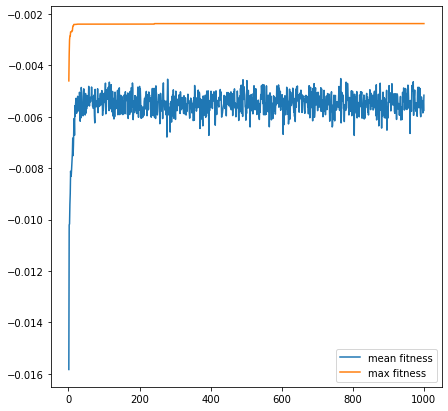


#############################
#			STATS			#
#############################


Total running time: 43 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.002373577913404692
Best individual: [-1.55868233  1.79515568 -0.13272544  0.19626023]
Wall time: 43.8 s


In [4]:
%%time

# genetic algorithm
def flow_fitness_function(data):
    def calc_dist(errors):
        mean_dist = 0
        #convert errors into variables (w,x,y,z)
        wxyz = np.array(list(map(lambda t:(0.01*t/(1+0.01*t)), errors)))
        for params in data:
            m = sum(params) # mismatch
            dist = abs(np.dot(params, wxyz) - m)/np.linalg.norm(params)
            mean_dist += dist
        mean_dist /= len(data)
        return -mean_dist #inverse because GA maximises the function
    return calc_dist

solver = ContinuousGenAlgSolver(
    n_genes = 4,
    fitness_function = flow_fitness_function(flowdata_array),
    variables_limits = (-3,3)
)

solver.solve()

Iteration: 100
Best fitness: -0.0023764036450873724
Iteration: 200
Best fitness: -0.002369810070041576
Iteration: 300
Best fitness: -0.002369809868052944
Iteration: 400
Best fitness: -0.0023698098678253737
Iteration: 500
Best fitness: -0.0023698098678241112
Iteration: 600
Best fitness: -0.002369809867824092
Iteration: 700
Best fitness: -0.002369809867824092
Iteration: 800
Best fitness: -0.002369809867824092
Iteration: 900
Best fitness: -0.002369809867824092
Iteration: 1000
Best fitness: -0.002369809867824092


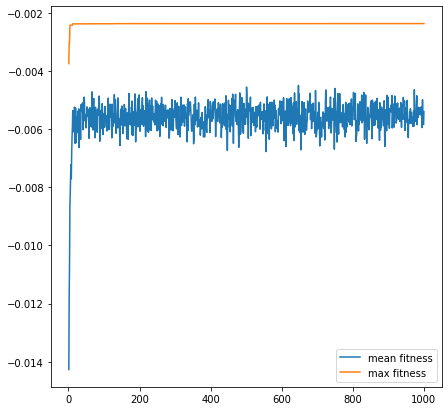


#############################
#			STATS			#
#############################


Total running time: 43 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.002369809867824092
Best individual: [-1.53233468  1.91639364 -0.17468788  0.35763056]


In [5]:
solver.solve()

Iteration: 100
Best fitness: -0.002359116490194109
Iteration: 200
Best fitness: -0.0023591137750905923
Iteration: 300
Best fitness: -0.0023591137749807735
Iteration: 400
Best fitness: -0.0023591137749807735
Iteration: 500
Best fitness: -0.0023591137749807735
Iteration: 600
Best fitness: -0.0023591137749807735
Iteration: 700
Best fitness: -0.0023591137749807735
Iteration: 800
Best fitness: -0.002345967746838673
Iteration: 900
Best fitness: -0.0023457918586713864
Iteration: 1000
Best fitness: -0.0023457918586713864


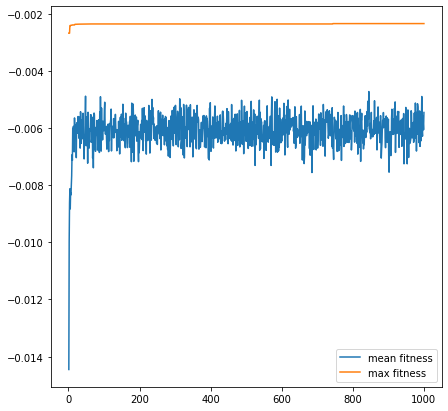


#############################
#			STATS			#
#############################


Total running time: 45 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.0023457918586713864
Best individual: [-0.50370066  2.92228855  0.93770228  1.30568925]


In [6]:
solver.solve()